# Transform Candlestick Patterns: just before

In [1]:
from src import utils as u
import pandas as pd
import random
import mplfinance as mpf
import os
import numpy as np

## Get the data

In [2]:
input_data_path = '../data'
input_data_filename = 'binance_BTCUSDT_1m_from_2020_01_01_to_2021_12_31_candlesticks_signals_raw'
input_data_extension = ".csv"
full_path_input_data = os.path.join(input_data_path, input_data_filename + input_data_extension)

In [3]:
df = pd.read_csv(full_path_input_data)

In [4]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR,CDLENGULFING,CDLENGULFINGBULLISH,CDLENGULFINGBEARISH
0,1577836800000,7195.24,7196.25,7183.14,7186.68,51.642812,1577836859999,371233.518355,493,19.598230,...,0,0,0,0,0,0,0,0,0,0
1,1577836860000,7187.67,7188.06,7182.20,7184.03,7.248148,1577836919999,52080.127788,135,2.031772,...,0,0,0,0,0,0,0,0,0,0
2,1577836920000,7184.41,7184.71,7180.26,7182.43,11.681677,1577836979999,83903.741635,202,5.479244,...,0,0,0,0,0,0,0,0,0,0
3,1577836980000,7183.83,7188.94,7182.49,7185.94,10.025391,1577837039999,72033.226649,136,3.294966,...,0,0,0,0,0,0,0,0,0,0
4,1577837040000,7185.54,7185.54,7178.64,7179.78,14.911105,1577837099999,107066.521825,161,2.369033,...,0,0,0,0,0,0,0,0,0,0


## Set the index on the dataframe

In [5]:
df.index = pd.DatetimeIndex(df['formatted_open_time'])

## Verify that the candlesticks are definitely showing a trend (down/up)

### Set some parameters

In [6]:
window_size = 50
slope_size = 7

### Get the dates from the bullish candlesticks patterns

In [7]:
list_dates_invertedhammer = df[df['CDLINVERTEDHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_hammer = df[df['CDLHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_piercing = df[df['CDLPIERCING'] == 100]['formatted_open_time'].to_list()
list_dates_morningstar = df[df['CDLMORNINGSTAR'] == 100]['formatted_open_time'].to_list()
list_dates_bullishengulfing = df[df['CDLENGULFINGBULLISH'] == 100]['formatted_open_time'].to_list()

In [8]:
list_all_dates = df['formatted_open_time'].to_list()

#### Get the amount of candlesticks patterns (before check)

In [9]:
print(f'BEFORE: number of inverted hammer:{len(list_dates_invertedhammer)}')
print(f'BEFORE: number of hammer:{len(list_dates_hammer)}')
print(f'BEFORE: number of piercing:{len(list_dates_piercing)}')
print(f'BEFORE: number of morning star:{len(list_dates_morningstar)}')
print(f'BEFORE: number of bullish engulfing:{len(list_dates_bullishengulfing)}')

BEFORE: number of inverted hammer:7061
BEFORE: number of hammer:34556
BEFORE: number of piercing:282
BEFORE: number of morning star:3546
BEFORE: number of bullish engulfing:36368


#### Run the checks to identify the real candlesticks with reversal

In [10]:
list_validate_dates_invertedhammer = []
list_new_sign_invertedhammer = []
for date in list_dates_invertedhammer:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_invertedhammer.append(date)
        list_new_sign_invertedhammer.append(1)
    else:
        list_new_sign_invertedhammer.append(0)

In [11]:
list_validate_dates_hammer = []
list_new_sign_hammer = []
for date in list_dates_hammer:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_hammer.append(date)
        list_new_sign_hammer.append(1)
    else:
        list_new_sign_hammer.append(0)        

In [12]:
list_validate_dates_piercing = []
list_new_sign_piercing = []
for date in list_dates_piercing:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_piercing.append(date)
        list_new_sign_piercing.append(1)
    else:
        list_new_sign_piercing.append(0)         

In [13]:
list_validate_dates_morningstar = []
list_new_sign_morningstar = []
for date in list_dates_morningstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_morningstar.append(date)
        list_new_sign_morningstar.append(1)
    else:
        list_new_sign_morningstar.append(0)          

In [14]:
list_validate_dates_bullishengulfing = []
list_new_sign_bullishengulfing = []
for date in list_dates_bullishengulfing:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_bullishengulfing.append(date)
        list_new_sign_bullishengulfing.append(1)
    else:
        list_new_sign_bullishengulfing.append(0)          

#### Get the amount of candlesticks patterns (after check)

In [15]:
print(f'AFTER: number of inverted hammer:{len(list_validate_dates_invertedhammer)}')
print(f'AFTER: number of hammer:{len(list_validate_dates_hammer)}')
print(f'AFTER: number of piercing:{len(list_validate_dates_piercing)}')
print(f'AFTER: number of morning star:{len(list_validate_dates_morningstar)}')
print(f'AFTER: number of bullish engulfing:{len(list_validate_dates_bullishengulfing)}')

AFTER: number of inverted hammer:273
AFTER: number of hammer:1501
AFTER: number of piercing:12
AFTER: number of morning star:277
AFTER: number of bullish engulfing:1992


### Plot some results

#### Inverted Hammer

7916


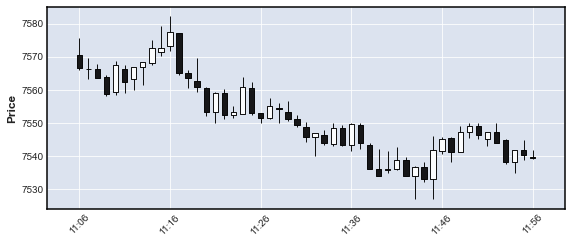

In [16]:
random_date = random.randint(0, len(list_validate_dates_invertedhammer)-1)
print(df.index.get_loc(list_validate_dates_invertedhammer[random_date]))
idx = df.index.get_loc(list_validate_dates_invertedhammer[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Hammer

999037


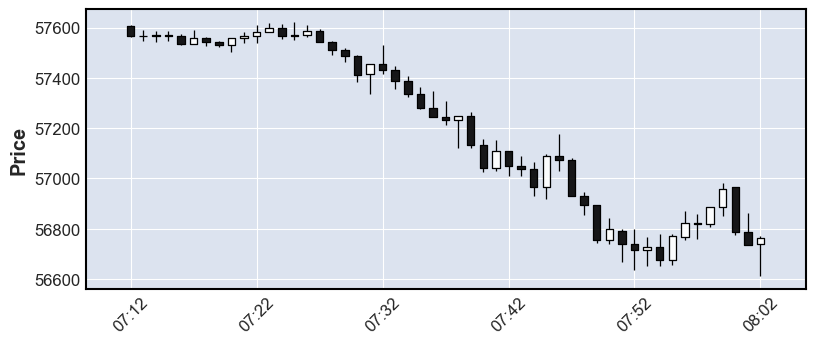

In [17]:
random_date = random.randint(0, len(list_validate_dates_hammer)-1)
print(df.index.get_loc(list_validate_dates_hammer[random_date]))
idx = df.index.get_loc(list_validate_dates_hammer[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Piercing

415844


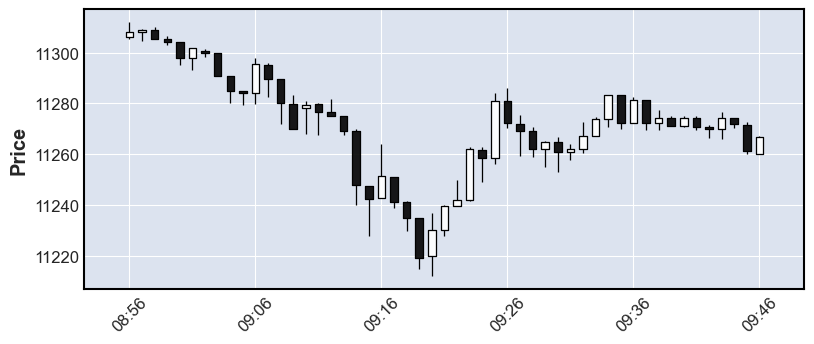

In [18]:
random_date = random.randint(0, len(list_validate_dates_piercing)-1)
print(df.index.get_loc(list_validate_dates_piercing[random_date]))
idx = df.index.get_loc(list_validate_dates_piercing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Morning Star

904902


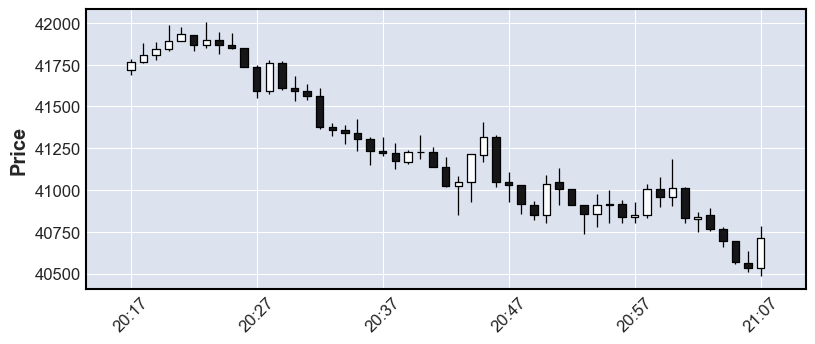

In [19]:
random_date = random.randint(0, len(list_validate_dates_morningstar)-1)
print(df.index.get_loc(list_validate_dates_morningstar[random_date]))
idx = df.index.get_loc(list_validate_dates_morningstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Bullish engulfing

491215


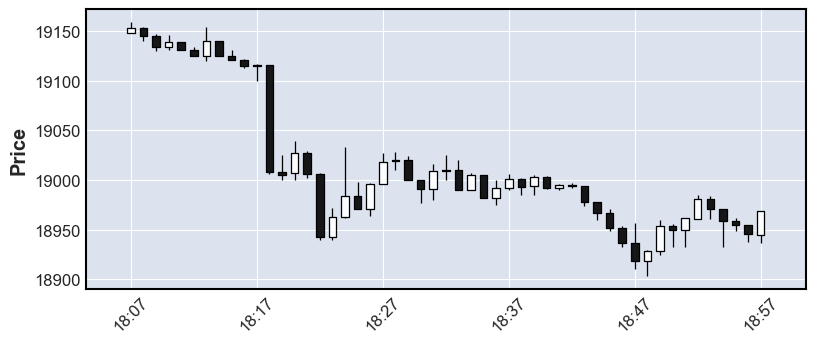

In [20]:
random_date = random.randint(0, len(list_validate_dates_bullishengulfing)-1)
print(df.index.get_loc(list_validate_dates_bullishengulfing[random_date]))
idx = df.index.get_loc(list_validate_dates_bullishengulfing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

### Get the dates from the bearish candlesticks patterns

In [21]:
list_dates_shootingstar = df[df['CDLSHOOTINGSTAR'] == -100]['formatted_open_time'].to_list()
list_dates_hangingman = df[df['CDLHANGINGMAN'] == -100]['formatted_open_time'].to_list()
list_dates_darkcloudcover = df[df['CDLDARKCLOUDCOVER'] == -100]['formatted_open_time'].to_list()
list_dates_eveningstar = df[df['CDLEVENINGSTAR'] == -100]['formatted_open_time'].to_list()
list_dates_bearishengulfing = df[df['CDLENGULFINGBEARISH'] == -100]['formatted_open_time'].to_list()

#### Get the amount of candlesticks patterns (before check)

In [22]:
print(f'BEFORE: number of shooting star:{len(list_dates_shootingstar)}')
print(f'BEFORE: number of hangingman:{len(list_dates_hangingman)}')
print(f'BEFORE: number of dark cloud cover:{len(list_dates_darkcloudcover)}')
print(f'BEFORE: number of evening star:{len(list_dates_eveningstar)}')
print(f'BEFORE: number of bearish engulfing:{len(list_dates_bearishengulfing)}')

BEFORE: number of shooting star:8400
BEFORE: number of hangingman:22099
BEFORE: number of dark cloud cover:427
BEFORE: number of evening star:3469
BEFORE: number of bearish engulfing:35971


#### Run the checks to identify the real candlesticks with reversal

In [23]:
list_validate_dates_shootingstar = []
list_new_sign_shootingstar = []
for date in list_dates_shootingstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_shootingstar.append(date)
        list_new_sign_shootingstar.append(-1)
    else:
        list_new_sign_shootingstar.append(0)                    

In [24]:
list_validate_dates_hangingman = []
list_new_sign_hangingman = []
for date in list_dates_hangingman:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_hangingman.append(date)
        list_new_sign_hangingman.append(-1)
    else:
        list_new_sign_hangingman.append(0)         

In [25]:
list_validate_dates_darkcloudcover = []
list_new_sign_darkcloudcover = []
for date in list_dates_darkcloudcover:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_darkcloudcover.append(date)
        list_new_sign_darkcloudcover.append(-1)
    else:
        list_new_sign_darkcloudcover.append(0)          

In [26]:
list_validate_dates_eveningstar = []
list_new_sign_eveningstar = []
for date in list_dates_eveningstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_eveningstar.append(date)
        list_new_sign_eveningstar.append(-1)
    else:
        list_new_sign_eveningstar.append(0)         

In [27]:
list_validate_dates_bearishengulfing = []
list_new_sign_bearishengulfing = []
for date in list_dates_bearishengulfing:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_bearishengulfing.append(date)
        list_new_sign_bearishengulfing.append(-1)
    else:
        list_new_sign_bearishengulfing.append(0)         

#### Get the amount of candlesticks patterns (after check)

In [28]:
print(f'AFTER: number of shooting star:{len(list_validate_dates_shootingstar)}')
print(f'AFTER: number of hangingman:{len(list_validate_dates_hangingman)}')
print(f'AFTER: number of dark cloud cover:{len(list_validate_dates_darkcloudcover)}')
print(f'AFTER: number of evening star:{len(list_validate_dates_eveningstar)}')
print(f'AFTER: number of bearish engulfoing:{len(list_validate_dates_bearishengulfing)}')

AFTER: number of shooting star:4259
AFTER: number of hangingman:12983
AFTER: number of dark cloud cover:243
AFTER: number of evening star:2510
AFTER: number of bearish engulfoing:19210


### Plot some results

#### Shooting Star

29310


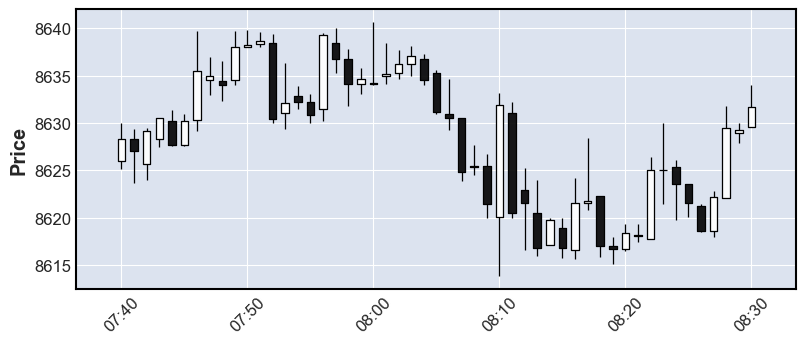

In [29]:
random_date = random.randint(0, len(list_validate_dates_shootingstar)-1)
print(df.index.get_loc(list_validate_dates_shootingstar[random_date]))
idx = df.index.get_loc(list_validate_dates_shootingstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Hangingman

910568


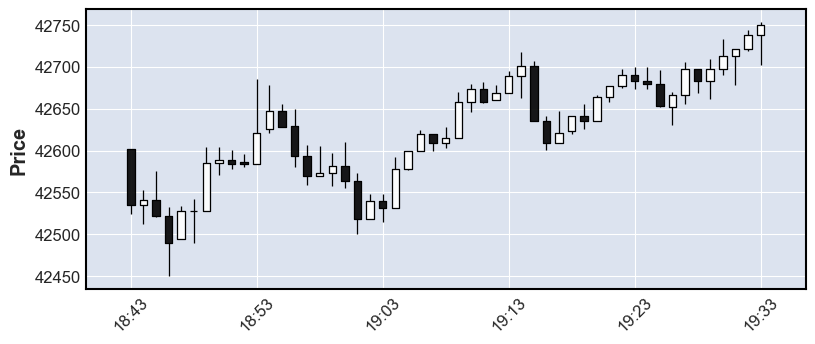

In [30]:
random_date = random.randint(0, len(list_validate_dates_hangingman)-1)
print(df.index.get_loc(list_validate_dates_hangingman[random_date]))
idx = df.index.get_loc(list_validate_dates_hangingman[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Dark Cloud Cover

820437


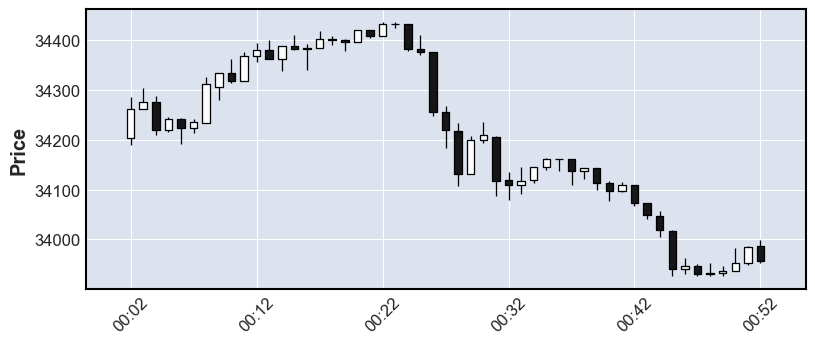

In [31]:
random_date = random.randint(0, len(list_validate_dates_darkcloudcover)-1)
print(df.index.get_loc(list_validate_dates_darkcloudcover[random_date]))
idx = df.index.get_loc(list_validate_dates_darkcloudcover[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Evening Star

266149


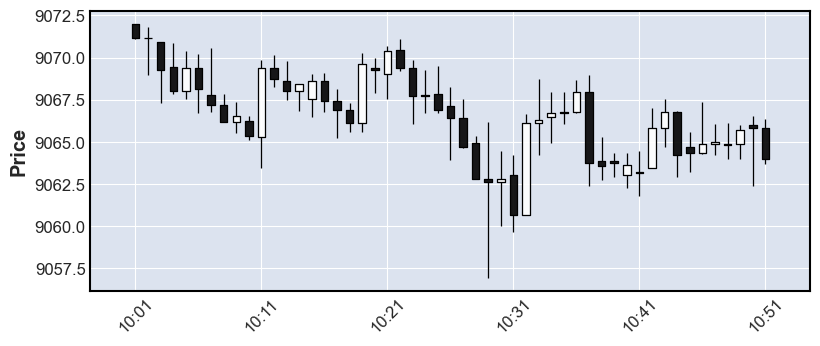

In [32]:
random_date = random.randint(0, len(list_validate_dates_eveningstar)-1)
print(df.index.get_loc(list_validate_dates_eveningstar[random_date]))
idx = df.index.get_loc(list_validate_dates_eveningstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Bearish Engulfing

47636


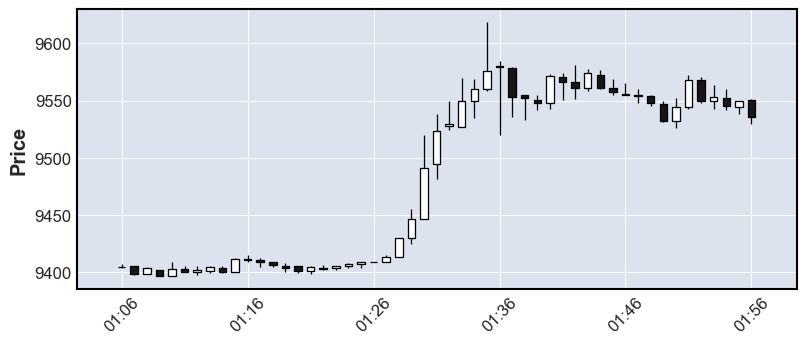

In [33]:
random_date = random.randint(0, len(list_validate_dates_bearishengulfing)-1)
print(df.index.get_loc(list_validate_dates_bearishengulfing[random_date]))
idx = df.index.get_loc(list_validate_dates_bearishengulfing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

## Create the Data with the validation

In [34]:
# list_new_column_name = ['CDLINVERTEDHAMMER_NEW', 'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW', 'CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW', 'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW']
# list_of_list_valid_dates = [list_validate_dates_invertedhammer, list_validate_dates_hammer, list_validate_dates_piercing, list_validate_dates_morningstar, list_validate_dates_shootingstar, list_validate_dates_hangingman, list_validate_dates_darkcloudcover, list_validate_dates_eveningstar]
# list_of_list_new_sign = [list_new_sign_invertedhammer, list_new_sign_hammer, list_new_sign_piercing, list_new_sign_morningstar, list_new_sign_shootingstar, list_new_sign_hangingman, list_new_sign_darkcloudcover, list_new_sign_eveningstar]

list_new_column_name_pos = ['CDLINVERTEDHAMMER_NEW', 'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW', 'CDLENGULFINGBULLISH_NEW']
list_new_column_name_neg = ['CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW', 'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW', 'CDLENGULFINGBEARISH_NEW']

list_of_list_valid_dates_pos = [list_validate_dates_invertedhammer, list_validate_dates_hammer, list_validate_dates_piercing, list_validate_dates_morningstar, list_validate_dates_bullishengulfing]
list_of_list_valid_dates_neg = [list_validate_dates_shootingstar, list_validate_dates_hangingman, list_validate_dates_darkcloudcover, list_validate_dates_eveningstar, list_validate_dates_bearishengulfing]

In [35]:
df.shape

(1048956, 28)

In [36]:
for i in range(0, len(list_new_column_name_pos)):
    df[list_new_column_name_pos[i]] = np.where(df['formatted_open_time'].isin(list_of_list_valid_dates_pos[i]), 1, 0)

In [37]:
for i in range(0, len(list_new_column_name_neg)):
    df[list_new_column_name_neg[i]] = np.where(df['formatted_open_time'].isin(list_of_list_valid_dates_neg[i]), -1, 0)

In [38]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLINVERTEDHAMMER_NEW,CDLHAMMER_NEW,CDLPIERCING_NEW,CDLMORNINGSTAR_NEW,CDLENGULFINGBULLISH_NEW,CDLSHOOTINGSTAR_NEW,CDLHANGINGMAN_NEW,CDLDARKCLOUDCOVER_NEW,CDLEVENINGSTAR_NEW,CDLENGULFINGBEARISH_NEW
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1577836800000,7195.24,7196.25,7183.14,7186.68,51.642812,1577836859999,371233.518355,493,19.598230,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 00:01:00,1577836860000,7187.67,7188.06,7182.20,7184.03,7.248148,1577836919999,52080.127788,135,2.031772,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 00:02:00,1577836920000,7184.41,7184.71,7180.26,7182.43,11.681677,1577836979999,83903.741635,202,5.479244,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 00:03:00,1577836980000,7183.83,7188.94,7182.49,7185.94,10.025391,1577837039999,72033.226649,136,3.294966,...,0,0,0,0,0,0,0,0,0,0
2020-01-01 00:04:00,1577837040000,7185.54,7185.54,7178.64,7179.78,14.911105,1577837099999,107066.521825,161,2.369033,...,0,0,0,0,0,0,0,0,0,0


### Check

In [39]:
df[df['CDLENGULFINGBEARISH_NEW'] == -1]

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLINVERTEDHAMMER_NEW,CDLHAMMER_NEW,CDLPIERCING_NEW,CDLMORNINGSTAR_NEW,CDLENGULFINGBULLISH_NEW,CDLSHOOTINGSTAR_NEW,CDLHANGINGMAN_NEW,CDLDARKCLOUDCOVER_NEW,CDLEVENINGSTAR_NEW,CDLENGULFINGBEARISH_NEW
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 01:35:00,1577842500000,7219.11,7219.37,7211.61,7211.61,9.956354,1577842559999,7.185415e+04,109,3.248184,...,0,0,0,0,0,0,0,0,0,-1
2020-01-01 01:41:00,1577842860000,7218.28,7218.28,7212.16,7212.68,8.530326,1577842919999,6.154514e+04,93,4.100182,...,0,0,0,0,0,0,0,0,0,-1
2020-01-01 01:55:00,1577843700000,7209.75,7210.37,7208.21,7209.03,9.117428,1577843759999,6.573471e+04,151,6.557182,...,0,0,0,0,0,0,0,0,0,-1
2020-01-01 02:36:00,1577846160000,7234.57,7234.73,7228.08,7229.44,17.501660,1577846219999,1.265671e+05,130,3.692405,...,0,0,0,0,0,0,0,0,0,-1
2020-01-01 03:21:00,1577848860000,7235.71,7236.74,7233.07,7233.48,8.057339,1577848919999,5.829667e+04,116,3.844065,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 19:41:00,1640893260000,47888.39,47900.00,47851.21,47851.22,35.809450,1640893319999,1.714754e+06,1090,23.330090,...,0,0,0,0,0,0,0,0,0,-1
2021-12-30 21:23:00,1640899380000,47278.86,47281.22,47236.55,47243.38,16.033390,1640899439999,7.575797e+05,546,9.266360,...,0,0,0,0,0,0,0,0,0,-1
2021-12-30 21:39:00,1640900340000,47342.16,47342.17,47287.22,47293.50,10.575070,1640900399999,5.003558e+05,446,2.329260,...,0,0,0,0,0,0,0,0,0,-1


## Export the Data

### Export parameters

In [40]:
export_path = "../data"
export_filename = 'binance_BTCUSDT_1m_from_2020_01_01_to_2021_12_31_candlesticks_signals_processed'
export_extension = ".csv"
full_export_path = os.path.join(export_path, export_filename + export_extension)

### Export

In [41]:
df.to_csv(full_export_path, index=False)